##### 1.We will use acoustic features to distinguish a male voice from female.
    Load the dataset from “voice.csv”,identify the target variable and do a one-hot encoding for the same. 
    Split the dataset in train-test with 20% of the data kept aside for testing.
        [Hint: Refer to LabelEncoder documentation in scikit-learn

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [5]:
voice=pd.read_csv("voice.csv")
invar=voice.copy()
invar=invar.drop(["label"],axis=1)

In [6]:
from sklearn import preprocessing

In [7]:
voice = voice.select_dtypes(include=[object])
voice.shape

(3168, 1)

In [8]:
# enc = preprocessing.OneHotEncoder()
# enc.fit(voice)
# onehotlabels = enc.transform(voice).toarray()
# onehotlabels.shape

(3168, 2)

In [25]:
le = preprocessing.LabelEncoder()
le.fit(voice)

LabelEncoder()

In [26]:
le.classes_

array(['female', 'male'], dtype=object)

In [29]:
depvar=le.transform(voice)
depvar

array([1, 1, 1, ..., 0, 0, 0])

##### 2.Fit a logistic regression model and measure the accuracy on the test set.
     [Hint:Refer to Linear Models section in scikit-learn]

In [30]:
x=invar
y=depvar

In [90]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr = LogisticRegression()

In [93]:
lr.fit(trainx, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
trainx.shape

(2534, 17)

In [95]:
trainy.shape

(2534,)

In [96]:
lrpredict=lr.predict(testx)
lrpredict

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [97]:
comparedf=pd.DataFrame({'Real Values':testy, 'Predicted values':lrpredict})
comparedf


,Real Values,Predicted values
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
629,0,0
630,0,0
631,1,1
632,0,0


In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(testy, lrpredict)

0.9100946372239748

In [100]:
lr.coef_

array([[-4.00062485e-01,  1.58002999e+00, -5.34920062e-01,
        -5.86575138e+00,  3.39315507e+00,  9.25890645e+00,
        -4.18887490e-02,  5.16475631e+00, -1.56021987e-01,
         1.09805270e+00, -1.67533346e+01,  2.63784522e-01,
        -2.16264290e+00, -8.77193317e-03, -1.06013888e+00,
        -3.59566105e-02, -9.07908257e-01]])

##### 3.Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. 
      Plot the correlation matrix using seaborn heatmap.
     [Hint: Explore dataframe methods to identify appropriate method
     
##### 4. Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with                          that of previous model.
              [Hint:Identify correlated variable pairs and remove one among them]

In [144]:
correlations=invar.corr().abs()
correlations.shape

(20, 20)

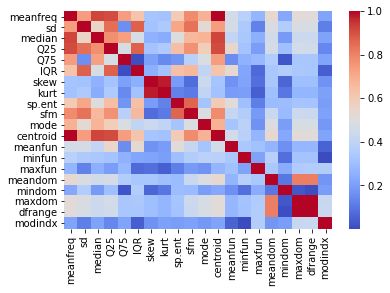

In [145]:
sns.heatmap(correlations, cmap='coolwarm')

In [146]:
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))

In [147]:
upper

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,NaN,0.739039,0.925445,0.911416,0.740997,0.627605,0.322327,0.316036,0.601203,0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,0.216979
sd,NaN,NaN,0.562603,0.846931,0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,0.529150,0.739039,0.466281,0.345609,0.129662,0.482726,0.357667,0.482278,0.475999,0.122660
median,NaN,NaN,NaN,0.774922,0.731849,0.477352,0.257407,0.243382,0.502005,0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,0.213298
Q25,NaN,NaN,NaN,NaN,0.477140,0.874189,0.319475,0.350182,0.648126,0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,0.141377
Q75,NaN,NaN,NaN,NaN,NaN,0.009636,0.206339,0.148881,0.174905,0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,0.023750,0.335114,0.335648,0.216475
IQR,NaN,NaN,NaN,NaN,NaN,NaN,0.249497,0.316185,0.640813,0.663601,0.403764,0.627605,0.534462,0.222680,0.069588,0.333362,0.357037,0.337877,0.331563,0.041252
skew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977020,0.195459,0.079694,0.434859,0.322327,0.167668,0.216954,0.080861,0.336848,0.061608,0.305651,0.304640,0.169325
kurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127644,0.109884,0.406722,0.316036,0.194560,0.203201,0.045667,0.303234,0.103313,0.274500,0.272729,0.205539
sp.ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866411,0.325298,0.601203,0.513194,0.305826,0.120738,0.293562,0.294869,0.324253,0.319054,0.198074
sfm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.485913,0.784332,0.421066,0.362100,0.192369,0.428442,0.289593,0.436649,0.431580,0.211477


In [148]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.98
                                                    )]

In [149]:
to_drop

['centroid', 'dfrange']

In [150]:
new_invar=invar.drop(['kurt', 'centroid', 'dfrange'],axis=1)

In [151]:
i=new_invar
o=depvar

In [152]:
trainx,testx,trainy,testy=train_test_split(i,o,test_size=0.2)

In [153]:
lr.fit(trainx,trainy)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
new_predict=lr.predict(testx)
new_predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [155]:
# compare=pd.DataFrame({'Real Values':testy, 'Predicted values':new_predict})
# compare

In [156]:
accuracy_score(testy, new_predict)

0.9132492113564669